<h1 style="text-align: center;">Лабораторная работа №5</h1>
<h2 style="text-align: center;">Спектральная теория графов</h2>
<h3 style="text-align: center;">Будем анализировать графы с помощью матриц</h3>

<p style="text-align: center;">Предмет: Практическая линейная алгебра</p>
<p style="text-align: center;"><i>Автор: Made by Polyakov Anton, the part of R3236, suir family</i></p>
<p style="text-align: center;">Преподаватель: Алексей Алексеевич Перегудин</p>
<p style="text-align: center;"><a href="https://github.com/GreedlyCore/practice_linear_algebra_labs">Исходный код, репозиторий</a></p>



## Навигация
1. [Вступление](#paragraph0)
2. [Вспомогательные функции и их описание](#paragraph2)
3. [Содержательная часть](#paragraph1)
    1. [Задание 1. Кластеризация социальной сети ](#subparagraph1)
    2. [Задание 2. Google PageRank алгоритм](#subparagraph2)
4. [Концовка, выводы](#paragraph3)

## Вступление, приветствие <a id="paragraph0"></a>

Всем привет, это моя лаба. Делал в VS code + jupyter notebook, экспортом файлов испытывал дикие проблемы, поэтому будьте осторожны, если захотите нативно отчёты в .ipynb делать




## Вспомогательные функции и библиотеки, их описание <a id="paragraph2"></a>

### Задание 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx # для построения графов

from numpy import linalg as LA # пакет линейной алгебры
from sklearn.cluster import KMeans # Для машинного обучения, отсюда берём k-means
from random import randint

def printBeauty(matrix, Type):
    A = pd.DataFrame(matrix.astype(Type))
    A.columns = ['']*A.shape[1]
    print(A.to_string(index=False))

def findMinIdx(n,matrix):
    result = []
    for i in range(n):
        elem = np.amin(matrix)
        i = np.where(np.isclose(matrix, elem))
        result.append(i)
        matrix[i]= 100000
    return result

def generateRandomHexColor():
    r = lambda: randint(0,255)
    return '#%02X%02X%02X' % (r(),r(),r())

def plotBeautyGraph(k, G, claster_points):
    # Подготавливаем цвета для узлов
    color_map = []
    colors = dict()

    s = set(list(claster_points))
    for el in s:
        colors.update({el:generateRandomHexColor()}) # "уникальные зоны"
    # Красим и выводим
    for node in G:
        color_map.append(colors[claster_points[node]])
    
    plt.title(f"Friends graph with k={k}")
    nx.draw_spring(G, node_color=color_map, node_size=200, font_size=14, with_labels=True)
    plt.show()
    
def doTask1(k, G, minVectors):
    km = KMeans(n_clusters = k, random_state = 0, n_init='auto')
    model = km.fit(minVectors)
    groups = model.labels_
    plotBeautyGraph(k, G, groups)
    


### Задание 2

In [2]:
def calculateM(G):
    M = []

    for i in range(0,15+1):
        for j in range(0,15+1):
            x = 0
            # ищем числитель из m_ij
            for edge in G.out_edges(j):
                if edge[1] == i:
                    x+=1
            # ищем знаменатель из m_ij
            y = len(G.out_edges(j))
            M.append(x/y)
    # округлим, чтобы не тащить тяжёлые дроби
    M = np.round(np.reshape(np.array(M), (16,16)),3)
    return M   

# imported from wiki 
def pagerank(M, num_iterations: int = 100, d: float = 1):
    """PageRank algorithm with explicit number of iterations. Returns ranking of nodes (pages) in the adjacency matrix.

    Parameters
    ----------
    M : numpy array
        adjacency matrix where M_i,j represents the link from 'j' to 'i', such that for all 'j'
        sum(i, M_i,j) = 1
    num_iterations : int, optional
        number of iterations, by default 100
    d : float, optional
        damping factor, by default 0.85

    Returns
    -------
    numpy array
        a vector of ranks such that v_i is the i-th rank from [0, 1],
        v sums to 1

    """
    N = M.shape[1]
    v = np.ones(N) / N
    M_hat = (d * M + (1 - d) / N)
    for i in range(num_iterations):
        v = M_hat @ v
    return v

## Содержательная часть <a id="paragraph1"></a>

### Задание 1. Кластеризация социальной сети <a id="subparagraph2"></a>

Задача этого задания состоит в том, чтобы выдеолить в неориентированной графе "социальных отношений" кластеры - сообществ, которые в большей степени дружат внутри себя, чем с другими людьми

Придумаем связный граф с помощью [этого](https://programforyou.ru/graph-redactor) сервиса, в нём создадим неориентированный граф, потом с помощью "волшебной палочки" мы можем дать случайную ориентацию всем рёбрам, это нам ещё пригодится при создании Лапласиана графа. Там же можно получить матрицу инцидентности...

<p align="center">
  <img src="graph_view_1.png" />
</p>

Получим Лапласиан неориетированного графа с помощью следующей формулы: $L = B*B^T$

In [3]:
inc = np.matrix(np.loadtxt('graph1_data.txt')) # скопировали матрицу инцидентности с сайта, теперь обработаем её здесь
L = inc*(inc.transpose())
printBeauty(L, int)

                                                                       
 3  0 -1 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  4 -1 -1 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0
-1 -1  4 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0
-1 -1 -1  4 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
-1 -1  0 -1  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  2 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0 -1  3 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
 0  0  0  0  0 -1 -1  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  3 -1 -1  0  0  0 -1  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0 -1  2 -1  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0 -1 -1  3  0  0 -1  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  2 -1 -1  0  0  0  0  0  0  0  0  0  0
 0 -1  0  0  0  0  0  0  0  0  0 -1  3 -1  0  0  0  0  0  0  0  

Определим собственные числа и векторы матрицы выше, их вышло довольно много (матрица 24х24 всё-таки), поэтому ограничимся выводом только собственных чисел. Заметим, что второе собственное число лапласиана далеко от нуля, что свидетельствует о хорошей связности графа, ведь в нашем случае он связный 

BTW, $\lambda_2 > 0$ - отвечает за [алгебраическую связность](https://en.wikipedia.org/wiki/Algebraic_connectivity?useskin=vector)

In [4]:
eigValuesL, eigVectorsL = LA.eig(L)
list(np.ndarray.round(eigValuesL,2))

[8.24,
 7.94,
 0.0,
 0.05,
 0.18,
 0.34,
 0.44,
 0.72,
 1.51,
 5.73,
 5.13,
 4.71,
 4.13,
 3.9,
 3.37,
 3.6,
 3.0,
 7.0,
 7.0,
 3.0,
 3.0,
 3.0,
 7.0,
 7.0]

Теперь выберем число k желаемых компонент кластеризации графа - так как граф небольшой, то на глаз можно понять, что должно быть около 5 кластеров
<p align="center">
  <img src="graph_view_2.png" />
</p>

In [5]:
k=3

Возьмём k собственных векторов $v_1,...,v_k$ матрицы Лапласа, соответствующих
самым маленьким собственным числам, и составим из них матрицу:
$$
\begin{bmatrix}
    \vert &       & \vert \\
    v_1   & \dots & v_k   \\
    \vert &       & \vert
\end{bmatrix}
$$
Ширина этой матрицы будет равна количеству компонент кластеризации $k$, а высота – числу вершин графа $n$.

In [6]:
# находим пять минимальных собственных значений
min_indices = np.argpartition(eigValuesL, 5)[:5] 
# матрица из 5 собственных векторов
# asarray используем, чтобы под аргументы функции k-means подогнать тип данных
min5Vectors = np.asarray(np.column_stack([eigVectorsL[:,[i]] for i in min_indices]))

Рассмотрим строки составленной матрицы $V$ как точки пространства $\mathbb{R}^k$. Применим к этим точкам [метод кластеризации k-means](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_k-%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B8%D1%85?useskin=vector) для разбиения их на k кластеров, простой графический пример что должно произойти ниже...
<p align="center">
  <img src="k-means_example.png" />
</p>

In [7]:
# init - какие начальные центроиды выбирать
# init='k-means++', по-умолчанию, тогда используется метод k-means++, 
# у которого уже свой алгоритм выбора центроид
# можно также сделать init = 'random', тогда центроиды - произвольные

# random_state - параметр для генерации случайных чисел внутри библиотеки

# n_init = 'auto' - при  таком параметре количество запусков опять будет
# определяться k-means методом, каждый запуск будет с разными  "centroid seeds"
# Лучший запуск определяется "инерционностью"
km = KMeans(n_clusters = k, random_state = 0, n_init='auto')
model = km.fit(min5Vectors)
groups = model.labels_

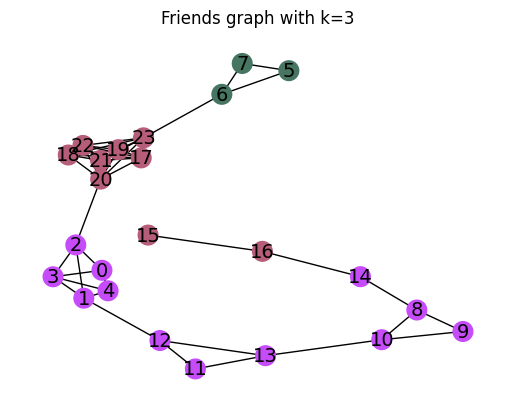

In [8]:
# С помощью таблицы смежности создадим изначальный граф для библиотеки-визуализатора
data = np.loadtxt("adjadency_matrix.txt")
G= nx.from_numpy_array(data) # G = graph 

plotBeautyGraph(k, G, groups) # все подробности функции в описании, в начале...

Попробуем проделать то же самое, но уже для других $k$. Упакуем все действия, связанные с методом $k-means$ и рисованием графа в общую функцию, результаты ниже...

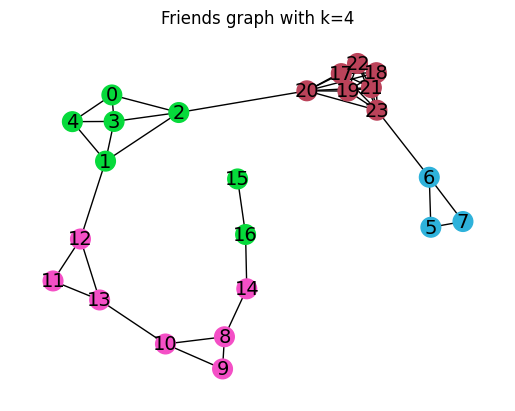

In [9]:
doTask1(4, G, min5Vectors)

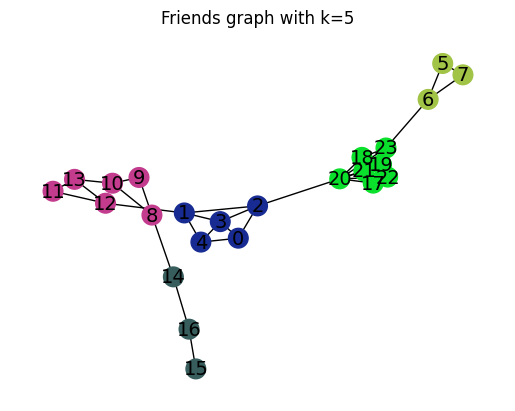

In [10]:
doTask1(5, G, min5Vectors)

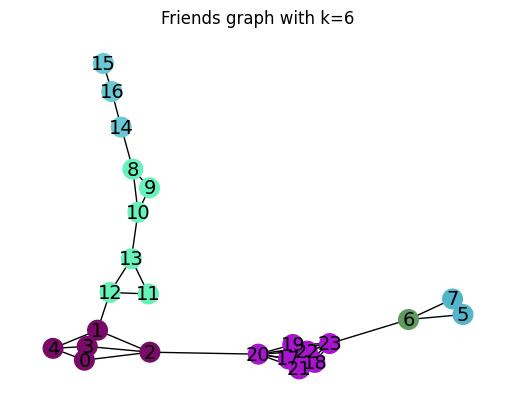

In [11]:
doTask1(6, G, min5Vectors)

Для небольших $k$ алгоритм делит граф вполне очевидно - ближайшие связи становятся товарищами по группе, но что будет при $k$ побольше?

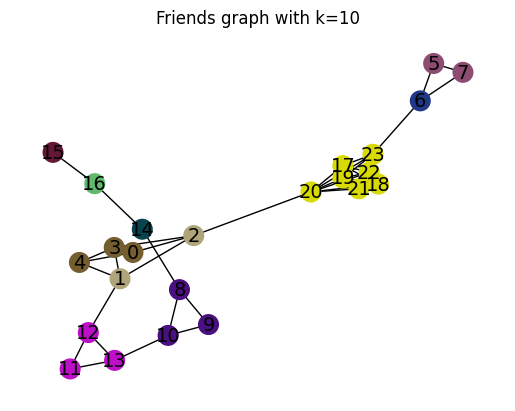

In [12]:
doTask1(10, G, min5Vectors)

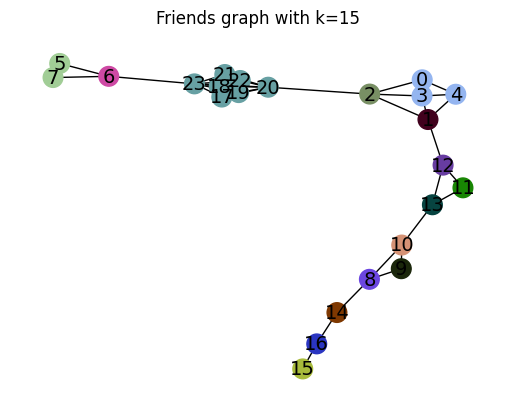

In [13]:
doTask1(15, G, min5Vectors)

Вот тут и начинаются проблемы, потому что алгоритм уже непонятными путями выбирает кластеры, давайте копнём немного в теорию...

#### Почему k-means сработал в нашем случае?

Мы положили в этот метод матрицу некоторых собственных векторов лапласиана, причём эти вектора соответствовали min собственным числам, и брали мы такое их количество, равное количеству кластеров, на которое мы хотели поделить наш граф. Это важно тоже учитывать...
Сработал этот метод потому, что собственные вектора несли в себе характеристику некоторых локальных "центров" графа, а метод уже довёл их до кластеров, не будем слишком сильно углубляться в особенности метода _k-means_, но поймём, что [этот ролик](https://www.youtube.com/watch?v=4b5d3muPQmA) неплохо визуализирует общий подход семейства таких методов, а также - алгоритм зависит от входного _k_, под которое он пытается подобрать лучшую по его мнению кластеризацию...


### Кратко про _k-means_ ?

Выбираем _k_  центров искомых кластеров (случайные точки, не обязательно из набора вершин, можно и по-другому выбирать), затем для каждой точки определяется номер центра ближайшего(по метрике смотрим, в нашем случае это евклидова 2) к ней, это и будет номер кластера к которому она принадлежит. Потом начинается итерационный процесс: от новых координат центров кластеров вновь пересчитываются все расстояния, элементы по новой переспределяются, алгоритм заканчивается при окончании распределения всех вершин между всеми кластерами. Но согласитесь, что возможно рано заканчивать по такому условию? Поэтому просто придумали запускать алгоритм при начальных расположениях _центроид_ и смотреть, какое соотношение захваченных вершин будет теперь. Если поделенное между всеми будет примерно поровну, значит кластеризацию провели верно. Например, если, при $k=10$ и 200 вершинах каждый кластер имеет ~20 вершин, то всё хорошо.
Очевидно, что из такого подхода вытекают некоторые минусы алгоритма...


### Какой [смысл](https://math.stackexchange.com/questions/3853424/what-does-the-value-of-eigenvectors-of-a-graph-laplacian-matrix-mean) несёт в себе собственный вектор лапласиана ?

Каждый вектор содержит кусочек информации о "локальной связности" вершин, поэтому нам недостаточно будет одного такого вектора, чтобы судить о кластеризации в целом. Чем больше вектооров мы имеем, тем больше поделить мы можем. Именно поэтому количество кластеров должно равняться количеству собственных векторов, которые мы берём для метода. Я лично понял такой вектор, если его развернуть в 2D график, небольшой пример думаю вам поможет...  


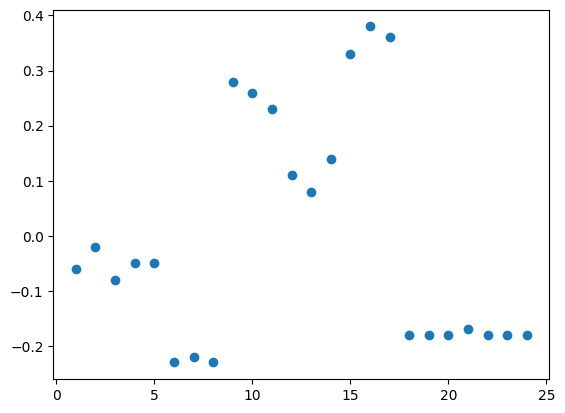

In [14]:
test_vector = np.ndarray.round(min5Vectors[:,[1]],2) # округлили для красоты графика
plt.scatter([i for i in range(1, len(test_vector)+1)],test_vector) # график
plt.show()

По оХ - порядковый номер компоненты в вектора, по оY - её значение. Если приглядется, то можно выделить следующие $k$ кластеров, и такое совпадение должно примерно получаться у каждого собственного вектора:
<p align="center">
  <img src="eigen_vector_example.png" />
</p>

### Почему собственные вектора должны соответствовать именно _минимальным_ собственным значениям, а не, например, _максимальным_? или каким-либо другим?


Из лекции по графам: чем меньше второе собственное число Лапласиана _связного графа_, тем этот граф **ближе к несвязному**, "есть узкое место внутри такого графа". В этом есть смысл, учитывая то, что каждый кластер по сути ограничем так называемым "узким местом", которое мы и должны задетектить.

### Задание 2. [Google PageRank алгоритм](https://en.wikipedia.org/wiki/PageRank?useskin=vector) <a id="subparagraph2"></a>

PageRank можно перевести с английского языка как «ранг страницы», однако Google Inc. связывает слово Page в названии алгоритма не с английским словом «страница», а с именем [Ларри Пейджа](https://en.wikipedia.org/wiki/Larry_Page?useskin=vector)

Создадим связный ориентированный граф из 16 вершин и 25 рёбер. Каждая вершина – это веб-страница, а стрелка – наличие ссылки, которая позволяет пользователю перейти с одной страницы на другую. Получим следующий граф...

<p align="center">
  <img src="graph_task2.png" />
</p>

Составим матрицу...
$$
M = \begin{bmatrix} 
    m_{11} & m_{12} & \dots & m_{1n}\\
     m_{21} & m_{22} & \dots & m_{2n}\\
    \vdots & \vdots & \ddots & \vdots \\
    m_{n1} & m_{n2} & \dots        & m_{nn} 
    \end{bmatrix}
\qquad
$$
где $m_{ij}$ – это отношение числа ссылок на $j$-й странице, которые ведут на $i$-ю
страницу, к общему числу ссылок на $j$-й странице.

Иными словами,
$$
mij = \frac{число\;стрелочек,\;выходящих\;из\;j-й\;вершины\;и\;входящих\;в\;i-ю\;вершину}{общее\;число\;стрелочек,\;выходящих\;из\;j-й\;вершины}
$$

Импортируем матрицу смежности с нашего любимого сайта и воспользуемся библиотекой _networkx_ для построения графа, а после в цикле пройдёмся с условием выше и составим матрицу M
 
Получается таким способом мы создали матрицу смежности с весами для нашего графа

In [15]:
data = np.loadtxt("test2.txt")
G= nx.DiGraph(data)  
M = calculateM(G)
printBeauty(M, float)

                                                                  
0.00 0.0 0.0 0.0 0.0 0.0 0.0 0.000 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.00 0.0 0.0 1.0 0.0 0.0 0.0 0.333 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0
0.25 0.0 0.0 0.0 0.0 0.0 0.5 0.000 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.00 0.0 1.0 0.0 0.0 0.0 0.5 0.000 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.00 0.5 0.0 0.0 0.0 1.0 0.0 0.000 0.0 0.0 0.0 0.5 0.0 0.0 0.0 0.0
0.00 0.0 0.0 0.0 0.5 0.0 0.0 0.000 0.5 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.25 0.0 0.0 0.0 0.0 0.0 0.0 0.333 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.25 0.0 0.0 0.0 0.0 0.0 0.0 0.000 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.25 0.0 0.0 0.0 0.0 0.0 0.0 0.000 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.00 0.0 0.0 0.0 0.0 0.0 0.0 0.000 0.5 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.00 0.0 0.0 0.0 0.0 0.0 0.0 0.000 0.0 0.0 0.0 0.5 0.0 0.0 1.0 0.0
0.00 0.5 0.0 0.0 0.5 0.0 0.0 0.000 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0
0.00 0.0 0.0 0.0 0.0 0.0 0.0 0.000 0.0 0.0 0.0 0.0 0.0 0.5 0.0 0.0
0.00 0.0 0.0 0.0 0.0 0.0 0.0 0.000 0.0 0.0 0.0 0.0 0.0 0.0 0.0

Найдём собственный вектор матрицы $M$, соответствующий наибольшему собственному числу...

Ниже вывели собственное число, а после - вектор, который ему соответствует

In [16]:
eigValuesM, eigVectorsM = LA.eig(M)
eigValuesM = list(np.real(np.ndarray.round(eigValuesM,3)))
max_eig_value = max(eigValuesM)
v = np.real(eigVectorsM[eigValuesM.index(max_eig_value)])

print(eigValuesM)
# printBeauty(v, float)

v_norm = v/sum(v)
printBeauty(v_norm, float)

[-0.895, 1.0, -0.25, -0.25, 0.395, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
             
 1.284750e-01
-1.515324e-01
 4.450258e-01
 4.450258e-01
-3.808656e-01
 3.514992e-16
 5.138715e-01
-3.364079e-01
 3.364079e-01
-5.887800e-17
-3.364079e-01
 5.887800e-17
-5.887800e-17
 5.887800e-17
 3.364079e-01
-5.887800e-17


Применим реализацию PageRank алгоритма, позаимствованную с википедии, при $d=1$. 

Результатом будет вектор, соответствующий вершинам нашего графа, а значения уже будут соответствовать вероятности случайного попадания спустя $iterations\;count$ итераций. Очевидно, что как и в [марковских процессах](https://en.wikipedia.org/wiki/Markov_chain?useskin=vector), вектор должен рано или поздно сходиться

In [17]:
d = 1; iterations_count = 1000
r2 = pagerank(M, iterations_count, d)
printBeauty(r2, float)

        
0.000000
0.117638
0.000000
0.000000
0.352914
0.176457
0.000000
0.000000
0.000000
0.000000
0.117638
0.235276
0.000000
0.000000
0.000000
0.000000


### Немного объяснений произошедшему


Получается, что мы столкнулись с марковским процессом, потому что сама википедия об этом говорит (CTRL+F -> Markov Chain). Доказательством этого будет также служить алгоритм построения матрицы вероятностей M и многое другое ( сумма столбцов такой матрицы всегда = 1 ) 

#### Какой смысл имеет матрица M, почему она составлена именно так, и что она показывает?


Это матрица вероятности, составленная по школьному(привет ЕГЭ!!!) определению вероятности:
$$P = \frac{m- благоприятные\;исходы}{n - все\;исходы}$$
Так как нас интересовало только количество стрелочек из $j \rightarrow i$, то как раз мы их и принимали за _благоприятные_ исходы. Таком образом благоприятные исходы значили вероятность кликнуть так, чтобы удачно переадресесоваться именно на $i$-ую страницу. А потом уже итеративно считали все возможные клики-переходы. В самой википедии используют подобную терминологию с "рандомными кликами"

#### Какую роль играет параметр d ?


Это Damping factor - коэффициент демпфирования - "смягчать нежелательное, вредное воздействие чего-либо". Это  вероятность, что на $n$-ом шаге юзер продолжит переходить рандомно по страницам графа. Также они добавляют, что  $1-d$ - вероятность на $n$-ом шаге перейти уже на произвольную случайную страницу, игнорирую графовую структуру. В нашем случау $d=1$, поэтому такие _случайности_ исключены, а также юзер продолжит кликать все итерации, которые мы зададим...


#### Как можно интерпретировать собственный вектор этой матрицы, соответствующий наибольшему собственному числу? 


Если принять это за марковский процесс, то это вектор сходимости, т.е. куда чаще всего попадёт юзер при очень долгом кликанье между страничками. Однако, сходимость может формировать не только один вектор, а сразу несколько, что и произошло в моём случае, потому что результат PageRank $\neq$ собственному вектору, соответствующему максимальному собственному числу

#### Почему важен именно этот собственный вектор, а не какой-то другой? 


Может оказаться и не один, тогда уже не предскажешь сходимость без моделирования в долгий срок. В моём случае процесс перехода по страницам _не сошёлся_ с марковским собственным вектором по неизвестной мне причине :( . Почему важно ответил в вопросе выше



## Концовка, выводы <a id="paragraph3"></a>

Спасибо всем, кто прочитал и оценил мою работу справедливо, держите картинку. И всем остальным тоже обязательно глянуть

<p align="center">
  <img src="the_end.jpg" />
</p>